Nama: Muhammad Daffa Al Rasyid


Link Dashboard: https://public.tableau.com/app/profile/muhammad.daffa.al.rasyid/viz/HTDS_M1_Muhammad_Daffa/Dashboard1?publish=yes

# Latar Belakang 

Ketika Anda melihat video game, apa yang Anda pikirkan? Kebanyakan orang akan berasumsi dan bahkan mengaitkan video game dengan permainan anak-anak atau aktivitas untuk orang yang belum dewasa. Namun ternyata industri video game adalah industri multi-miliar dolar yang tersebar di seluruh dunia dan digunakan oleh banyak kelompok usia, tidak hanya anak-anak.

Industri video game sendiri sudah ada sejak tahun 70-an dan masih bertahan hingga saat ini, apalagi di era konektivitas dan globalisasi yang selalu ada permintaan untuk lebih banyak game dengan inovasi baru. 

dengan itu munculah rumusan tujuan dari analisis ini yaitu:
Untuk mengetahui faktor apa yang berkontribusi kesuksesan sebuah video game secara keseluruhan


Adapun juga rumusan masalah yang di tentukan dalam analisis ini yaitu:

1. Genre game apa yang merupakan genre dengan penghasilan terbanyak?
2. Pada dekade apa dimana penjualan video game yang terbanyak?
3. Daerah penjualan dimana yang memiliki peran dalam pendapatan game secara keseluruhan?
4. Bagaimana perbandingan rata-rata penjualan antara daerah Jepang dengan sisa daerah selain Amerika utara dan Eropa?
4. Platform game apa yang paling menghasilkan video game dengan pendapatan terbanyak?
6. Bagaimana dengan central tendency dari platform game yang memiliki pendapatan terbanyak?
5. Publisher mana yang memiliki pendapatan terbesar dari video game?

# Data Loading

Pada langkah pertama disini, hal yang pertama yang perlu dilakukan adalah meload data set yang didapatkan dari internet disini kasusnya adalah dari kaggle tentang list penjualan video game

link: https://www.kaggle.com/datasets/ulrikthygepedersen/video-games-sales

In [2]:
#Rumus untuk mengimport pandas
import pandas as pd

In [3]:
#Rumus untuk membaca file csv dari database yang telah di download
df = pd.read_csv('video_games_sales.csv')

In [4]:
df

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Dari data tersebut terdapat missing values seperti tidak adanya tahun di beberapa entries serta tidak ada nya publisher di beberapa entries. Lalu di bagian tahun sebaiknya diganti type data nya menjadi integer karena hanya menampilkan tahun

# Data Cleaning

Dalam langkah berikutnya adalah proses untuk melakukan data cleaning, dimana disini kita akan membersihkan data dari error-error yang ada

In [6]:
#Rumus untuk mengetahui jumlah data yang null atau missing value
df.isnull().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

Dari hasil perhtiungan diatas bisa dilihat data yang missing value atau hilang merupakan data dari column year dan publisher, hal ini terjadi karena adanya human error yang mengakibatkan ketidak lengkapan data. Karena data tersebut hanya ada sebanyak 271 dari 16598 entries maka langkah yang diambil adalah untuk mendrop entry yang memiliki data hilang

In [7]:
#Rumus membuat dataframe baru yang tidak ada missing values nya
df_2 = df.dropna()

In [8]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16291 non-null  int64  
 1   name          16291 non-null  object 
 2   platform      16291 non-null  object 
 3   year          16291 non-null  float64
 4   genre         16291 non-null  object 
 5   publisher     16291 non-null  object 
 6   na_sales      16291 non-null  float64
 7   eu_sales      16291 non-null  float64
 8   jp_sales      16291 non-null  float64
 9   other_sales   16291 non-null  float64
 10  global_sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Setelah itu jika dilihat type data tahun atau year masih dalam bentuk float maka dari itu perlu diganti menjadi integer

In [9]:
#Rumus untuk mengubah tipe data tahun menjadi integer
df_2['year']= df_2['year'].astype(int)

C:\Users\daffa\AppData\Local\Temp\ipykernel_1344\2259918458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['year']= df_2['year'].astype(int)


In [10]:
df_2

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Setelah data dibersihkan maka data di export untuk diubah menjadi file csv agar bisa dibuatkan visualisasinya

In [11]:
#Rumus untuk mengexport data menjadi format csv
df_2.to_csv('Data Penjualan game clean.csv')

# Analisis dan Perhitungan

Untuk menjawab pertanyaan nomor 1 tentang genre perlu diketahui genre-genre apa saja yang berada dalam database

In [12]:
#Rumus untuk mengetahui unique values berada dalam column genre
df_2['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [13]:
#Rumus untuk memisahkan data berdasarkan genre
df_genre_sports = df_2[df_2['genre'] == 'Sports'] 
df_genre_Platform = df_2[df_2['genre'] == 'Platform'] 
df_genre_Racing = df_2[df_2['genre'] == 'Racing'] 
df_genre_Role_Playing = df_2[df_2['genre'] == 'Role-Playing'] 
df_genre_Puzzle = df_2[df_2['genre'] == 'Puzzle'] 
df_genre_Shooter = df_2[df_2['genre'] == 'Shooter']
df_genre_Simulation = df_2[df_2['genre'] == 'Simulation'] 
df_genre_Action = df_2[df_2['genre'] == 'Action'] 
df_genre_Fighting = df_2[df_2['genre'] == 'Fighting'] 
df_genre_Adventure = df_2[df_2['genre'] == 'Adventure'] 
df_genre_Strategy = df_2[df_2['genre'] == 'Strategy']  

In [14]:
#Rumus untuk menghitung total penjualan dari sebuah genre game
total_sales_sports = df_genre_sports['global_sales'].sum()
total_sales_1 = df_genre_Platform['global_sales'].sum()
total_sales_2 = df_genre_Racing['global_sales'].sum()
total_sales_3 = df_genre_Role_Playing['global_sales'].sum()
total_sales_4 = df_genre_Puzzle['global_sales'].sum()
total_sales_5 = df_genre_Shooter['global_sales'].sum()
total_sales_6 = df_genre_Simulation['global_sales'].sum()
total_sales_7 = df_genre_Action['global_sales'].sum()
total_sales_8 = df_genre_Fighting['global_sales'].sum()
total_sales_9 = df_genre_Adventure['global_sales'].sum()
total_sales_10 = df_genre_Strategy['global_sales'].sum()

In [15]:
#Rumus untuk menampilkan total penjualan berdasarkan genre
print(f'Total penjualan genre sports: {total_sales_sports}')
print(f'Total penjualan genre Platform: {total_sales_1}')
print(f'Total penjualan genre Racing: {total_sales_2}')
print(f'Total penjualan genre Role playing: {total_sales_3}')
print(f'Total penjualan genre Puzzle: {total_sales_4}')
print(f'Total penjualan genre Shooter: {total_sales_5}')
print(f'Total penjualan genre Simulation: {total_sales_6}')
print(f'Total penjualan genre Action: {total_sales_7}')
print(f'Total penjualan genre Fighting: {total_sales_8}')
print(f'Total penjualan genre Adventure: {total_sales_9}')
print(f'Total penjualan genre strategy: {total_sales_10}')

Total penjualan genre sports: 1309.2400000000002
Total penjualan genre Platform: 829.13
Total penjualan genre Racing: 726.7600000000001
Total penjualan genre Role playing: 923.83
Total penjualan genre Puzzle: 242.21
Total penjualan genre Shooter: 1026.2
Total penjualan genre Simulation: 389.98
Total penjualan genre Action: 1722.84
Total penjualan genre Fighting: 444.04999999999995
Total penjualan genre Adventure: 234.59
Total penjualan genre strategy: 173.27


Dari hasil ini bisa disimpulkan bahwa genre terlaku dalam industry game ialah genre Action, lalu dilanjutkan oleh Sports, dilanjutkan lagi oleh shooter, dsb.

Untuk menjawab pertanyaan nomor 2, perlu dilakukan untuk membuat column baru yaitu colum dekade

In [16]:
#Rumus untuk membuat column baru dekade
df_2['Decade']= (df_2['year'] // 10) * 10

C:\Users\daffa\AppData\Local\Temp\ipykernel_1344\3851726704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Decade']= (df_2['year'] // 10) * 10


In [17]:
#Rumus untuk melakukan pengelompokan data sales berdasarkan column dekade
sales_by_decade = df_2.groupby('Decade')['global_sales'].sum()

In [18]:
#Rumus untuk menampilkan total penjualan per dekade
print(f"List penjualan berdasarkan dekade: {sales_by_decade}")

List penjualan berdasarkan dekade: Decade
1980     376.58
1990    1278.91
2000    4636.08
2010    2520.11
2020       0.29
Name: global_sales, dtype: float64


Dari hasil data ini, bisa dilihat bahwa penjualan terbanyak berada dalam dekade 2000an lalu dilanjutkan oleh 2010

Untuk menjawab pertanyaan nomor 3, perlu dilakukan sebuah penjumlahan dari total penjualan masing-masing region yang ada dalam databse

In [19]:
#Rumus untuk membuat variabel baru yaitu total penjualan semua negara
Total_sales_per_region = df_2[['na_sales', 'eu_sales', 'jp_sales','other_sales']].sum()
#Rumus untuk menghitung proporsi penjualan masing-masing region terhadap penjualan global
Proportion_of_sales_Region = Total_sales_per_region / Total_sales_per_region.sum()

In [20]:
#Rumus menampilkan total penjualan per region
Total_sales_per_region

na_sales       4327.65
eu_sales       2406.69
jp_sales       1284.27
other_sales     788.91
dtype: float64

In [21]:
#Rumus untuk menentukan proporsi penjualan per region
Proportion_of_sales_Region

na_sales       0.491359
eu_sales       0.273254
jp_sales       0.145815
other_sales    0.089572
dtype: float64

Dari hasil data ini, bisa dilihat bahwa Benua Amerika utara merupakan region dengan penyumbang terbesar terhadap penjualan keseluruhan

Bagian selanjutnya bertujuan untuk menjawab pertanyaan tentang perbandingan rata-rata penjualan antara jepang dan daerah selain eropa dengan amerika utara maka daeri itu dibuat lah 2 hypothesis yaitu:

H0:rata-rata penjualan di jepang sama dengan rata-rata penjualan di daerah selain amerika utara dan eropa

H1:rata-rata penjualan di jepang tidak sama dengan rata-rata penjualan di daerah selain amerika utara dan eropa
Lalu untuk menjawab pertanyaan selanjutnya perlu untuk mengimport statistic terlebih dahulu baru bisa menentukan hypothesis yang benar

In [22]:
#Rumus untuk mengimport stats
from scipy import stats
from scipy.stats import ttest_ind


In [23]:
#Rumus untuk menghitung P value dan T statistic
t_stat, p_val = stats.ttest_ind(df_2['jp_sales'],df_2['other_sales'])
print('T-Statistic:',t_stat)
print('P-value:',p_val) 

T-Statistic: 10.625971141961578
P-value: 2.4921490442616333e-26


In [29]:
import matplotlib.pyplot as plt

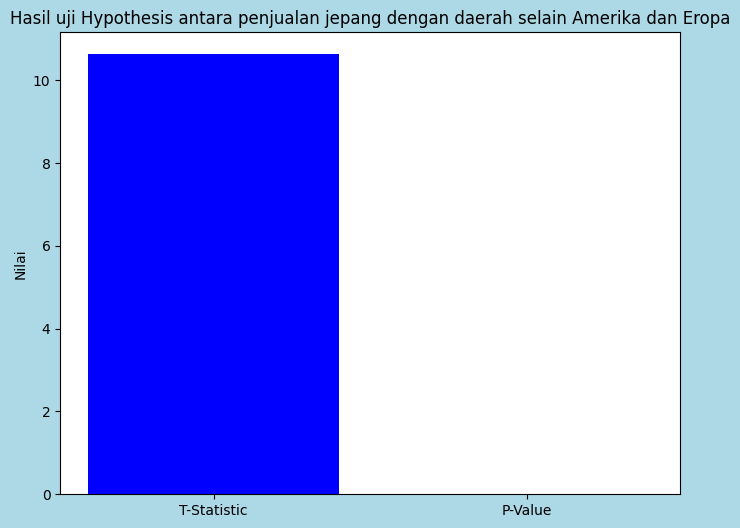

In [35]:
plt.figure(figsize=(8, 6), facecolor = 'lightblue')
plt.bar(['T-Statistic', 'P-Value'], [t_stat, p_val], color=['blue', 'green'])
plt.title('Hasil uji Hypothesis antara penjualan jepang dengan daerah selain Amerika dan Eropa')
plt.ylabel('Nilai')
plt.show()

Berdasarkan hasil tersebut nilai t-statistic adalah 10.626 dimana itu adalah nilai positif yang menunjukkan bahwa rata-rata penjualan di Jepang cenderung lebih tinggi daripada rata-rata penjualan di wilayah lainnya. Lalu Nilai Probabilitas dari data ini sangat kecil atau dibawah 0.05 dimana menunjukan adanya perbedaan signifikan antara penjualan di jepang dengan penjualan dari wilayah selain amerika utara dan eropa maka dari itu H0 ditolak dan H1 diterima

Untuk menjawab pertanyaan selanjutnya perlu dilakukan grouping data penjualan dengan platform yang tersedia

In [24]:
#Rumus untuk melakukan pengelompokan data di platform
sales_by_platform = df_2.groupby('platform')['global_sales'].sum()

In [25]:
#Rumus untuk menampilkan platform dengan penjualan game terbanyak
sales_by_platform.sort_values(ascending= False)

platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
GB       254.42
XB       252.09
NES      251.07
3DS      246.27
N64      218.21
SNES     200.05
GC       197.14
XOne     141.06
2600      86.57
WiiU      81.86
PSV       61.60
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: global_sales, dtype: float64

Dari hasil data tersebut bisa disimpulkan bahwa PS2 merupakan platform dengan penjualan game terbanyak

Untuk menjawab pertanyaan tersebut, perlu dilakukan perhitungan statistik central tendency seperti mean, modus, median pada platform dengan penujualan terbanyak yaitu PS2

In [26]:
#Rumus untuk menghitung rata-rata penjualan game pada platform PS2
mean_ps2 = df_2[df_2['platform'] == 'PS2']['global_sales'].mean()
print("Rata-Rata Penjualan Game PS2:", mean_ps2)

#Rumus untuk menghitung median penjualan game pada platform PS2
median_ps2 = df_2[df_2['platform'] == 'PS2']['global_sales'].median()
print("Median Penjualan Game PS2:", median_ps2)

#Rumus untuk menghitung modus penjualan game pada platform PS2
mode_ps2 = df_2[df_2['platform'] == 'PS2']['global_sales'].mode()
print("Modus Penjualan Game PS2:", mode_ps2)

Rata-Rata Penjualan Game PS2: 0.5799059708509638
Median Penjualan Game PS2: 0.23
Modus Penjualan Game PS2: 0    0.02
Name: global_sales, dtype: float64


Rata-rata penjualan game di platform PS2 adalah sekitar 0.5799 juta dollar, Lalu dilanjutkan oleh median penjualan game PS2 yaitu sekitar 0.23 juta dollar, dan di akhiri dengan modus pada penjualan game di platform PS2 yaitu 0.02 juta dollar

Pada bagian ini, kita akan menjawab pertanyaan terakhir yaitu tentang publisher dengan penjualan game terbanyak, maka dari itu kita perlu untuk mengelompoka n penjualan g lobal berdasarkan publisher

In [27]:
#Rumus untuk membuat variabel penjualan berdasarkan Publisher
sales_by_publisher = df_2.groupby('publisher')['global_sales'].sum()

In [28]:
#Rumus untuk menampilkan urutan penjulaan berdasarkan publisher dan diurut dari yang tertinggi
sales_by_publisher.sort_values(ascending= False)

publisher
Nintendo                       1784.43
Electronic Arts                1093.39
Activision                      721.41
Sony Computer Entertainment     607.28
Ubisoft                         473.54
                                ...   
Epic Games                        0.01
Paradox Development               0.01
Rain Games                        0.01
Ascaron Entertainment             0.01
Commseed                          0.01
Name: global_sales, Length: 576, dtype: float64

Berdasarkan hasil ini bisa disimpulkan bahwa Nintendo merupakan publisher dengan hasil penjualan terbanyak dari publisher lainnya

# Kesimpulan

Berdasarkan Hasil Analisis diatas, Industri Video Game merupakan industri yang sangat dinamis dan selalu berubah-rubah dimana dari hasil analisis Genre Action merupakan genre dengan hasil terbanyak sementara lalu hasil data pun juga Benua Amerika Utara merupakan konsumen utama dari industri video game dimana mereka berkontribusi sebanyak hampir 50% penjualan global. Walaupun penjualan sekarang tidak sebanyak penjualan pada dekade 2000an tetapi penjualan dari industri game sendiri pun masih bisa dibilang sangat tinggi dimana di dekade 2010an menjual sebanyak 2520 Juta dollar jadi permintaan akan game dan innovasi baru masih ada dan masih ada potensinya